In [1]:
!pip install spacy


In [2]:
!pip install langdetect
!python -m spacy download el_core_news_sm


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sentence_transformers import SentenceTransformer
from collections import Counter
import matplotlib.pyplot as plt
import nltk
import re
import random
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from langdetect import detect
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

     ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.6 MB 5.6 MB/s eta 0:00:03
     --------- ------------------------------ 3.1/12.6 MB 9.7 MB/s eta 0:00:01
     ---------------- ----------------------- 5.2/12.6 MB 10.3 MB/s eta 0:00:01
     ------------------------ --------------- 7.6/12.6 MB 10.4 MB/s eta 0:00:01
     ------------------------------ --------- 9.7/12.6 MB 10.6 MB/s eta 0:00:01
     ------------------------------------- - 12.1/12.6 MB 10.5 MB/s eta 0:00:01
     ---------------------------------------- 12.6/12.6 MB 9.9 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Katerina\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Katerina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:



df = pd.read_csv('C:/Users/Katerina/Documents/Chatbot/Customer Utterances.csv')


query_column = "Utterance"
queries = df[query_column].dropna().tolist()  # Convert to list and remove NaN values


# Load Greek SpaCy model
import spacy
nlp = spacy.load("el_core_news_sm")

  # Load stopwords
english_stopwords = set(stopwords.words('english'))
greek_stopwords = set(stopwords.words('greek'))
custom_stopwords = set(['θέλω','έχω',
    'και', 'να', 'το', 'μου', 'του', 'της', 'εγω', 'ένα', 'σε', 'με', 'για','κάνω', 'εγώ',
    'θα', 'απο', 'αυτό', 'αυτή', 'αυτο', 'ότι', 'πως', 'πολύ', 'εδώ', 'εκεί', 'είμαι','ακόμη', 'αυτές', 'στο','στις', 'στους','στα','στο','στη','δικό', 'δικού',
'δικός','εσάς', 'την', 'τα', 'είναι','μια', 'μία','έχει', 'είχαμε', 'είχα', 'έχουμε', 'έχετε','ήθελα','κάνετε', 'κάνει', 'έκανα','κάποιον', 'κάποιο', 'κάποιες','λέω', 'δω', 'μπω', 'πω', 'πείτε','τους', 'σας', 'μας','μπορείτε', 'μπορούσατε', 'μπορούσα', 'μπορεί',
'τη', 'τους', 'τo', 'η', 'οι', 'τα', 'το', 'την', 'των', 'τις', 'τον','όλων', 'όλης', 'όλο', 'όλοι', 'όλους','οποίο','ποιους', 'ποια', 'ποιο', 'ποιες','ποιον','πόση','πόσες','πόση', 'πόσα','πόσα','σ',"σε"]) 
custom_stopwords = {word.lower() for word in custom_stopwords}

def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char == ' '])  # punctuation
    # Process text using SpaCy
    doc = nlp(text)
    # Apply lemmatization and stopword removal (using the lemmatized form)
    text = ' '.join([token.lemma_ for token in doc if token.lemma_.lower() not in english_stopwords
                     and token.lemma_.lower() not in greek_stopwords
                     and token.lemma_.lower() not in custom_stopwords])

    return text






In [4]:
data = [preprocess_text(text) for text in queries]
df["processed_queries"] = data
df.to_csv("processed_queries.csv", index=False)
df

,Utterance,Cluster,processed_queries
0,πρέπει να έχω πάσο για να βάλω φοιτητικό,NaN,πρέπει πάσο βάλω φοιτητικός
1,θα ήθελα να κάνω διακανονισμό σε όλο το ληξιπρ...,NaN,διακανονισμός όλος ληξιπρόθεσμο
2,θέλω χρόνο για να μιλάω,NaN,χρόνος μιλάως
3,χρειάζομαι ανανέωση,NaN,χρειάζομαι ανανέωση
4,τo παραστατικό του σταθερού μου,NaN,παραστατικός σταθερού
...,...,...,...
673,επιθυμώ να βάλω λεπτά ομιλίας,NaN,επιθυμώ βάλω λεπτό ομιλία
674,περιμένω τον συνάδελφό σας να έρθει για το ραν...,NaN,περιμένω συνάδελφος έρθει ραντεβού
675,θέλω να ενημερωθώ για τον τρόπο που μπορεί να ...,NaN,ενημερωθώ τρόπος μπορώ γίνομαι αίτηση
676,πότε έχει προγραμματιστεί το νέο ραντεβού,NaN,πότε προγραμματίζω νέος ραντεβού


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

C:\Users\Katerina\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Katerina\.cache\huggingface\hub\models--sentence-transformers--paraphrase-multilingual-mpnet-base-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

C:\Users\Katerina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Katerina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Katerina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Katerina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory le

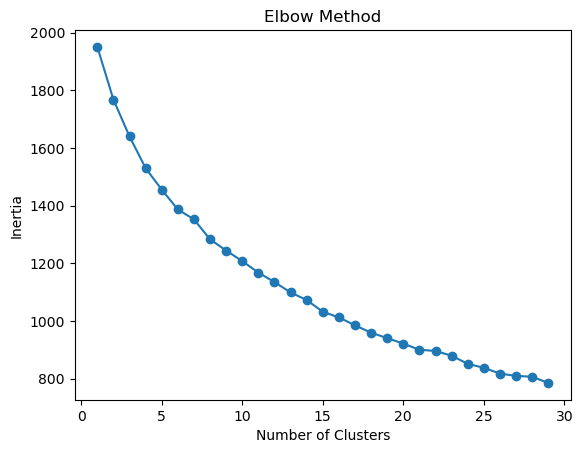

In [5]:
# Load Sentence-BERT model
model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')

# Generate sentence embeddings
sentence_embeddings = model.encode(data)

# optimal number of clusters
inertia = []
for k in range(1, 30):  # Test 1 to 20 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(sentence_embeddings)
    inertia.append(kmeans.inertia_)

# Elbow plot
plt.plot(range(1, 30), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


C:\Users\Katerina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Katerina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Katerina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Katerina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory le

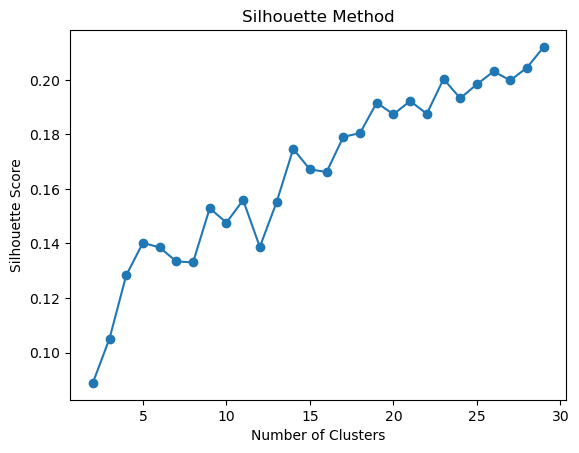

In [6]:
from sklearn.metrics import silhouette_score

# Test different numbers of clusters
silhouette_scores = []
for k in range(2, 30):  # Start from 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(sentence_embeddings)
    score = silhouette_score(sentence_embeddings, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.plot(range(2, 30), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()


In [7]:
# Check lemmatization for the first few queries
for query in data[:20
                  ]:  # Iterate over the first  preprocessed queries
    doc = nlp(query)  # Process the query with SpaCy
    print([token.lemma_ for token in doc])  # Print lemmatized words


['πρέπει', 'πάσο', 'βάλω', 'φοιτητικός']
['διακανονισμός', 'όλος', 'ληξιπρόθεσμο']
['χρόνος', 'μιλάως']
['χρειάζομαι', 'ανανέωση']
['παραστατικός', 'σταθερού']
['τιμή', 'νέος', 'tablet']
['ενημερωθώ', 'σχετικά', 'διαθέσιμος', 'υπόλοιπος']
['αποπληρωμή', 'λογαριασμός', 'κινητό']
['αίτηση', 'φοιτητικός', 'πακέτο']
['απενεργοποιηθεί']
['tethering']
['ραντεβού', 'νέος', 'σύνδεση']
['παράπονο']
['εξοφλώ', 'τηλέφωνό']
['εξοφλώ', 'κινητό']
['λογαριασμός', 'τηλεόραση']
['βάλω', 'πιο', 'εύκολος', 'κωδικός', 'σε', 'ο', 'hotspot']
['αγορά', 'tablet']
['πώς', 'μπορώ', 'καταθέσω', 'αίτηση']
['λογαριασμός', 'τηλεόραση']


In [8]:
num_clusters = 8

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(sentence_embeddings)

# Add cluster labels to results
results = pd.DataFrame({
    'Query': data,
    'Cluster': kmeans.labels_
})

# Automate intent labeling using top keywords
top_keywords = {}
for cluster in range(num_clusters):
    cluster_queries = results[results['Cluster'] == cluster]['Query']
    words = ' '.join(cluster_queries).split()
    top_keywords[cluster] = Counter(words).most_common(5)  # Top 5 keywords

# Print top keywords for each cluster
for cluster, keywords in top_keywords.items():
    print(f"Cluster {cluster}: {keywords}")



C:\Users\Katerina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Cluster 0: [('διακανονισμός', 24), ('υπόλοιπος', 17), ('μάθω', 11), ('ανανέωση', 10), ('επιθυμώ', 10)]
Cluster 1: [('οφειλή', 30), ('χρωστάω', 13), ('αποπληρωμή', 13), ('λογαριασμός', 13), ('εξόφληση', 13)]
Cluster 2: [('κλήσεων', 32), ('ανάλυση', 30), ('κινητό', 26), ('λογαριασμός', 23), ('σε', 16)]
Cluster 3: [('αίτηση', 35), ('μπορώ', 25), ('τρόπος', 13), ('πώς', 12), ('καταχωρώ', 11)]
Cluster 4: [('λογαριασμός', 55), ('αναλυτικός', 18), ('διακανονισμός', 15), ('υπηρεσία', 11), ('σε', 10)]
Cluster 5: [('tethering', 18), ('πώς', 5), ('δουλεύω', 3), ('κινητό', 2), ('κάτι', 2)]
Cluster 6: [('ομιλία', 41), ('χρόνος', 27), ('ραντεβού', 26), ('ένας', 15), ('λεπτό', 15)]
Cluster 7: [('hotspot', 23), ('πώς', 7), ('σε', 4), ('ο', 4), ('κινητό', 4)]


In [9]:
cluster_labels_mapping = {
    0: "--",
    1: "--",
    2: "--ν",
    3:"--",
    4: "--",
    5:"--",
    6: "--",
    7: "--"
}

In [10]:
# Simple CLI for testing
def predict_intent(query):

    embedding = model.encode([query])
    cluster = kmeans.predict(embedding)[0]
    return cluster_labels_mapping.get(cluster, 'unknown intent')

# Test the CLI
while True:
    query = input("Enter your query (or type 'exit' to quit): ")
    if query.lower() == 'exit':
        break
    intent = predict_intent(query)
    print(f"Predicted Intent: {intent}")



Enter your query (or type 'exit' to quit):  exit


In [11]:
# View all rows of each cluster
for cluster in range(num_clusters):
    print(f"Cluster {cluster}: {cluster_labels_mapping.get(cluster, 'Unknown')}")
    cluster_data = results[results['Cluster'] == cluster]
    print(cluster_data[['Query']])  # Display only the query column 
    print("\n" + "="*50 + "\n")


Cluster 0: --
                                      Query
0               πρέπει πάσο βάλω φοιτητικός
1           διακανονισμός όλος ληξιπρόθεσμο
3                       χρειάζομαι ανανέωση
4                     παραστατικός σταθερού
6    ενημερωθώ σχετικά διαθέσιμος υπόλοιπος
..                                      ...
663                                απόκρυψη
664          εξόφληση παραστατικός σταθερού
670                            απενεργοποιώ
671                 από πού βλέπω υπόλοιπος
672                            ενεργοποίηση

[176 rows x 1 columns]


Cluster 1: --
                              Query
21   πού μπορώ βρω πληροφορία χρέος
22     πόσος χρήμα χρωστάω συνολικά
41   πώς μπορώ μάθω συνολικός χρέος
42           αποπληρωμή λογαριασμός
43               αποπληρώσως οφειλή
..                              ...
630        διακανονίζω ποσό χρωστάω
646            εξόφληση λογαριασμός
654      πόσος χρήμα χρωστάω τελικά
661         μάθω πόσος χρήμα οφείλω
677   εξόφληση λογαρια